In [71]:
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt
from sklearn.manifold import Isomap
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

plt.rc('text', usetex=True)  # Abilita l'uso di LaTeX in tutte le stringhe di testo
plt.rc('font', family='serif')

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [11]:
digits = datasets.load_digits()
print(digits.images.shape)
print(digits.keys())

(1797, 8, 8)
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


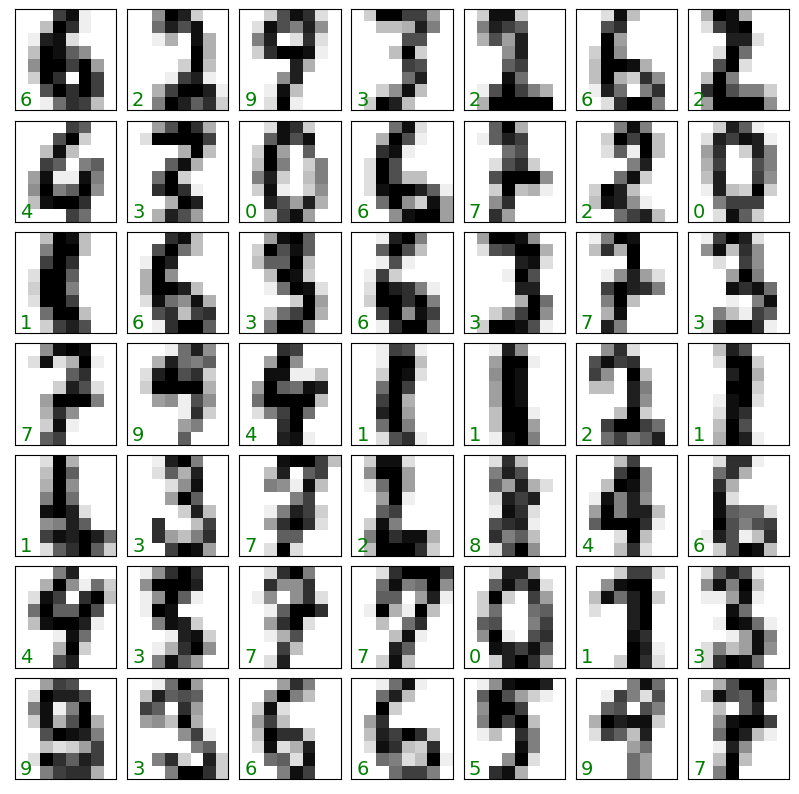

In [6]:
fig, axes = plt.subplots(7,7, figsize=(10, 10))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

np.random.seed(42)
mychoices = np.random.choice(digits.images.shape[0],100)

for i, ax in enumerate(axes.flat):
    ax.imshow((digits.images[mychoices[i]]), 
              cmap='binary')
    ax.text(0.05, 0.05, str(digits.target[mychoices[i]]),transform=ax.transAxes, color='green', fontsize=14)
    ax.set_xticks([])
    ax.set_yticks([])

In [7]:
print(digits.data.shape)

# The images themselves
print(digits.images[0])

# The data for use in our algorithms
print(digits.data[0])

# The labels
print(digits.target)
print(digits.target[0])

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[0 1 2 ... 8 9 8]
0


### Tasks. Part 1. Unsupervised Learning: Dimensionality Reduction on Digits

We'd like to visualize our points within the 64-dimensional parameter space, but it's difficult to plot points in $N=64$ dimensions! So we need to reduce the dimensionality of the space


3) Use the unsupervised dimensionality reduction technique called **[`Isomap`](http://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html#sklearn.manifold.Isomap)**. Isomap is an embedding tecnique, which tries to understand if your $N$ dimensional datapoint live in a $N$ dimensional (with $N<M$) manyfold. Have a look at the Isomap documentation and reduce the MINST dataset.  Do some plots to visualize your results 

*Note*. Isomap is very recent. It was introduced by [Tenenbaum et al (2000)](https://www.science.org/doi/10.1126/science.290.5500.2319) ---a paper that has something like $1.5\times 10^4$ [citations](https://scholar.google.com/scholar?hl=en&as_sdt=0%2C5&q=a+global+geometric+framework+for+nonlinear+dimensionality+reduction&btnG=).


In [76]:
embedding = Isomap(n_neighbors=8, n_components=4) #increased n_neigh after a warning
dig_transformed = embedding.fit_transform(digits.data)
print(dig_transformed.shape)

(1797, 4)


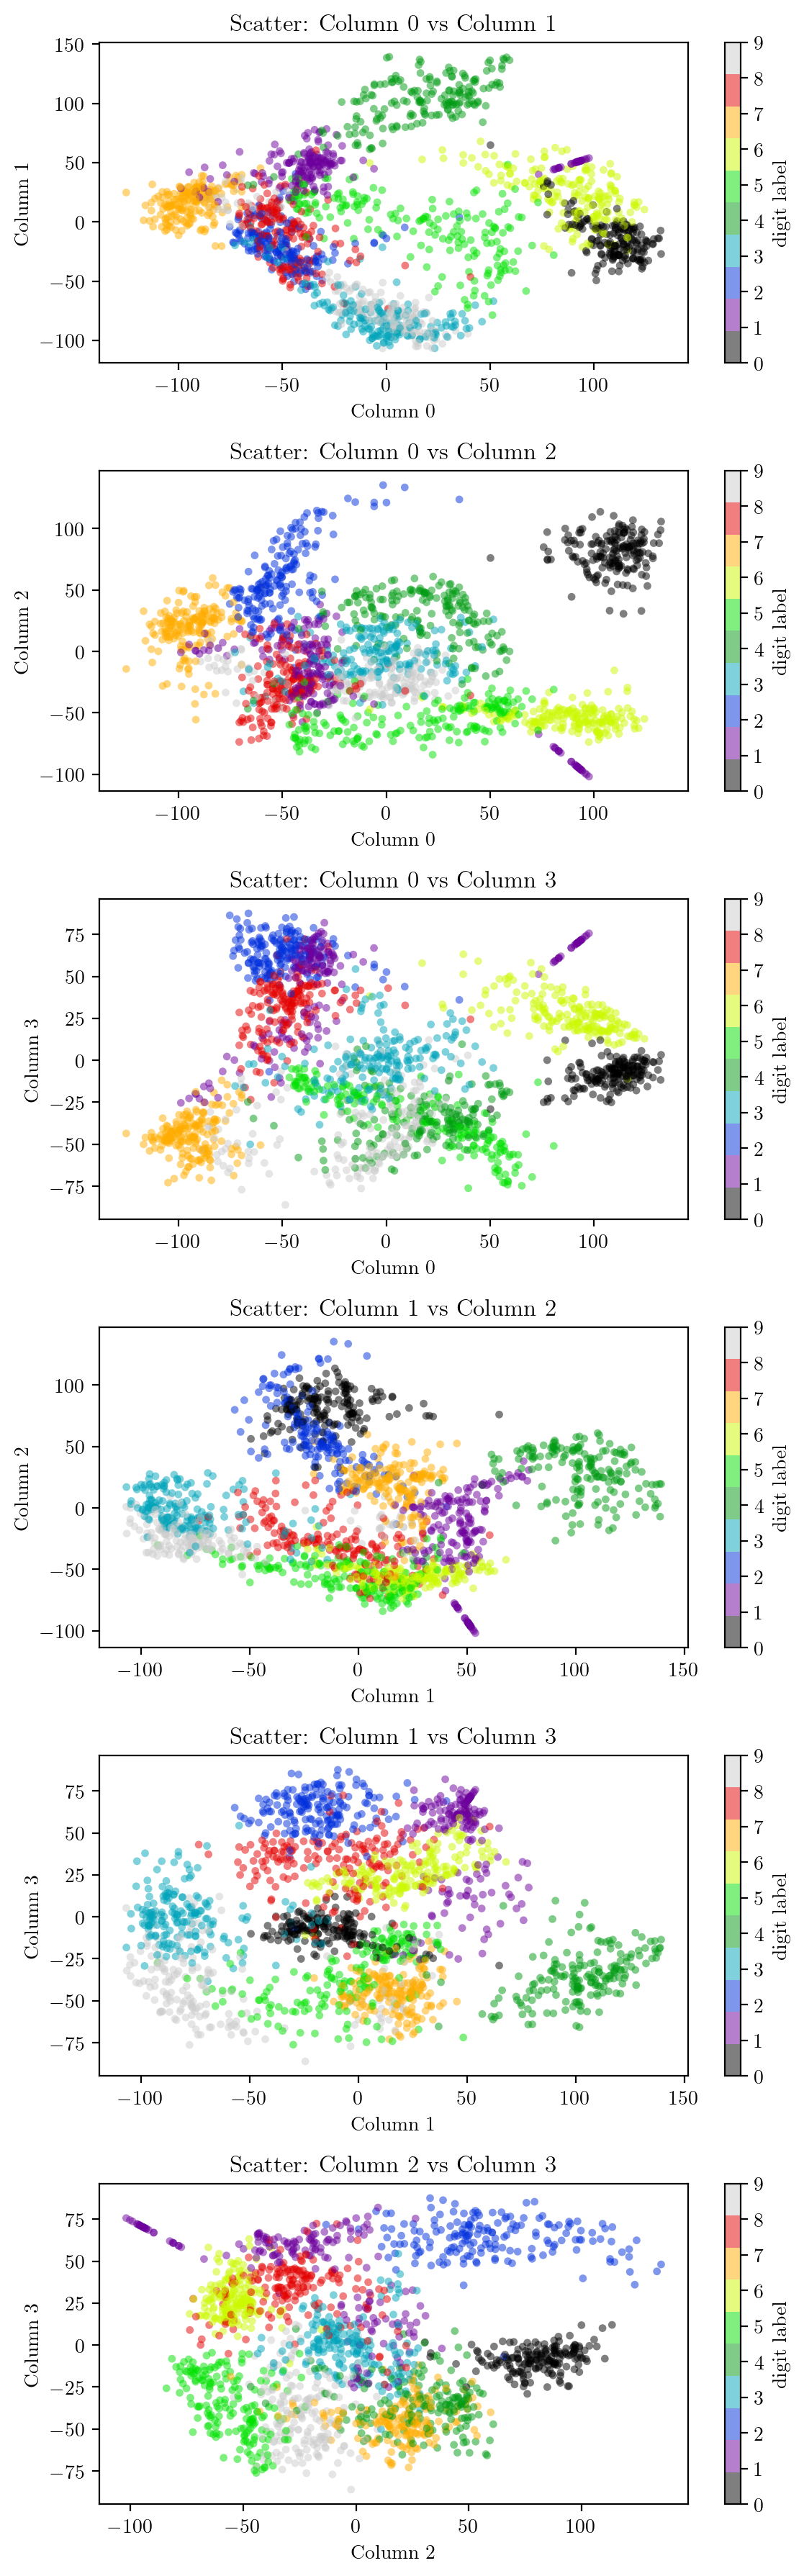

In [88]:
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""
    base = plt.colormaps[base_cmap]
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

num_cols = dig_transformed.shape[1]  # Numero di colonne in dig_transformed

# Creare tutte le combinazioni possibili tra le colonne
combinations = list(itertools.combinations(range(num_cols), 2))

# Creare i subplot basati sul numero di combinazioni
fig, axes = plt.subplots(len(combinations), figsize=(6, 3 * len(combinations) ))

# Scatter plot per ogni combinazione
for i, (x, y) in enumerate(combinations):
    sc = axes[i].scatter(dig_transformed[:, x], dig_transformed[:, y], s=15, c=digits.target, edgecolor='none', alpha=0.5, cmap=discrete_cmap(10, 'nipy_spectral'))
    axes[i].set_xlabel(f'Column {x}')
    axes[i].set_ylabel(f'Column {y}')
    axes[i].set_title(f'Scatter: Column {x} vs Column {y}')
    
    # Aggiungere una barra dei colori per ogni subplot
    cbar = fig.colorbar(sc, ax=axes[i])
    cbar.set_label('digit label')
    cbar.set_ticks(range(10))


#plt.colorbar(label='digit label', ticks=range(10))
plt.tight_layout()
plt.show()

In [38]:
embedding = Isomap(n_neighbors=8, n_components=2) #increased n_neigh after a warning
dig_transformed = embedding.fit_transform(digits.data)
print(dig_transformed.shape)

(1797, 2)


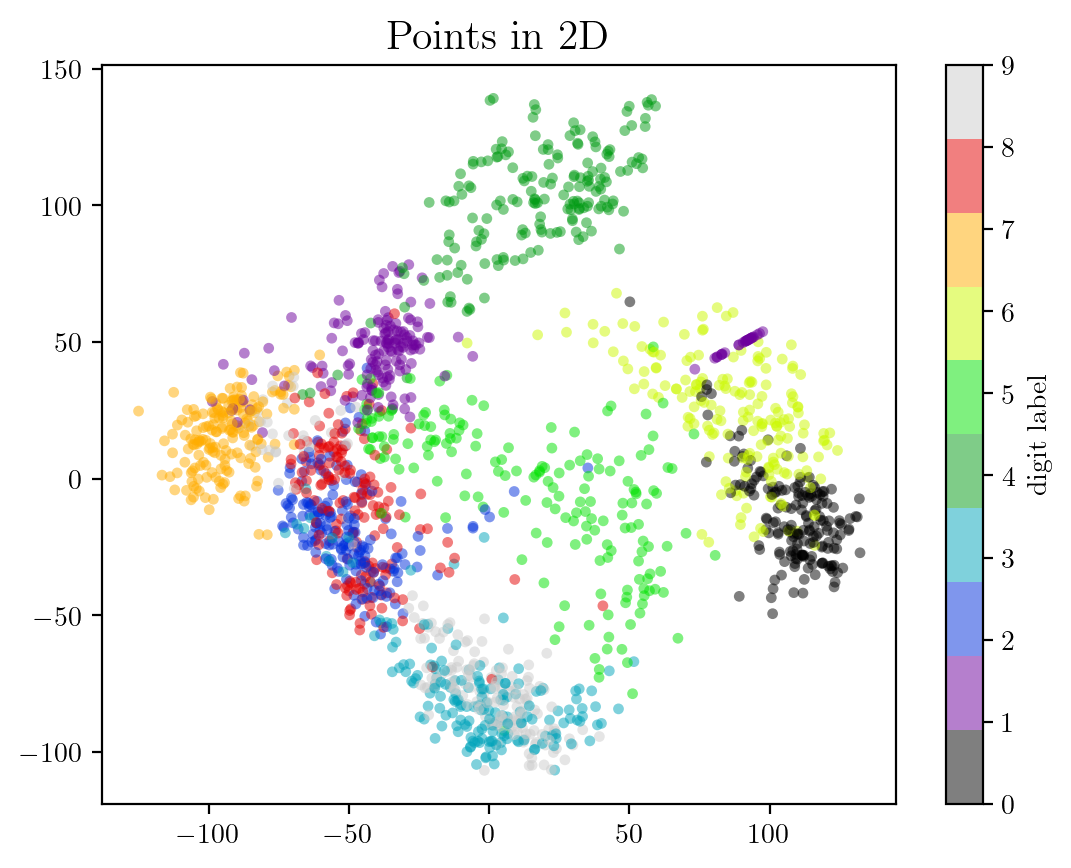

In [74]:
plt.scatter(dig_transformed[:, 0], dig_transformed[:, 1], s=15,  c=digits.target, edgecolor='none', alpha=0.5, cmap=discrete_cmap(10,'nipy_spectral'))
# Add the color bar
plt.colorbar(label='digit label', ticks=range(10))
plt.title('Points in 2D',fontsize=15)
plt.show()

### Tasks. Part 2. Supervised Learning: Classification on Digits

Now we want to classify the dataset. 

4) Split the dataset taking 80% of the images as tranining dataset and leaving the other 20% as a validation set. You need `sklearn.model_selection.train_test_split`.

5) Use a simple [`Logistic Regression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) which despite its name is a common classification algorithm. (I know, this is confusing!). Use the flag `solver='sag'` (I found the default solver had a bug, at least when I tried).

6) Compute the accuracy (`sklearn.metrics.accuracy_score`) of your emulator. In this context, accuracy is simply the fraction of the digits that were correctly identified. Compute the accuracy on both the training and the validation set. Comment on the results.

7) The accuracy is a single number doesn't tell us ***where*** we've gone wrong. Plot the ***confusion matrix*** as we did above. What are the digits that are more challenging to identify, does it make sense?


There are many ways to improve this classifier, for example using a more sophisticated model, use cross validation, etc.  We'll get to those in the coming weeks.

In [60]:
data_train, data_test, target_train, target_test = train_test_split(digits.data, digits.target, test_size=0.20, random_state=8)
print(dig_test.shape, dig_train.shape, target_test.shape, target_train.shape)

(360, 64) (1437, 64) (360,) (1437,)


In [65]:
clf = LogisticRegression(random_state=8, solver='sag', max_iter=1000).fit(data_train, target_train)
target_pred = clf.predict(dig_test)

#### Accuracy for the test set 

In [69]:
accuracy_score(target_test, target_pred) #defaul is normalized true so we have the fraction

0.9638888888888889

#### Accuracy for the training set 

In [70]:
#accuracy on training test , it's obv 1 bc the algoritm "already know" the answer bc it was trained on that (?)
accuracy_score(clf.predict(dig_train), target_train)

1.0

#### Confusion Matrix on test set

In [72]:
print(confusion_matrix(target_test, target_pred))

[[34  0  0  0  0  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  1  0]
 [ 0  0 32  0  0  0  0  0  0  0]
 [ 0  0  0 36  0  1  0  0  0  1]
 [ 0  0  0  0 25  0  0  0  1  0]
 [ 0  0  0  0  0 47  0  0  0  2]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 40  0  0]
 [ 0  4  0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  1  0  0  2 31]]


It's struggling a lil bit with some 8 that the algorithm interprets as 1